###  auto_mpg에 들어있는 컬럼에 따른 mpg 예측 - 다항회귀
- 데이터셋 : auto_mpg.csv
- 학습종류 : 지도학습 / 다항회귀Regression - 값을 예측
- 알고리즘 : lineregression
- 피쳐 : corr이 가장 높은 weight
- 타겟:  mpg

In [227]:
## 1-1
import pandas as pd
# 데이터 분석 및 전처리
import numpy as np
# 숫자처리
import matplotlib.pyplot as plt
# 데이터 시각화

from sklearn.linear_model import LinearRegression
                            ## ML 알고리즘
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score
                            ## 성능평가 모듈
from sklearn.model_selection import train_test_split
                            ## 데이터셋 분리 관련 모듈
                            ## 학습/검증/테스트 
from sklearn.preprocessing import MinMaxScaler
                            ## 정규화

In [228]:
mpgDF = pd.DataFrame(pd.read_csv('../data/auto_mpg.csv'))
mpgDF['horsepower'] = mpgDF['horsepower'].replace('?', 'nan')
mpgDF = mpgDF.ffill()


In [229]:
mpgDF['horsepower'] = mpgDF['horsepower'].astype(float)
mpgDF = mpgDF.ffill()
mpgDF.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

mpg와 연관성 있는 데이터.
- cylinder, displacement, horsepower, weight
- 정규화도 필요

In [230]:
for _ in range(5):
    mpgDF.drop(mpgDF['displacement'].idxmax(),inplace=True)
mpgDF

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
399,31.0,4.0,119.0,82.0,2720.0,19.4,82,1,chevy s-10
400,27.0,4.0,140.0,86.0,2720.0,15.6,82,1,ford mustang gl
401,44.0,4.0,97.0,86.0,2720.0,24.6,82,2,vw pickup
402,22.0,6.0,232.0,86.0,2835.0,14.7,82,1,ford granada l


In [231]:
mpgDF.loc[mpgDF['horsepower']==200,:].count()

mpg             1
cylinders       1
displacement    1
horsepower      1
weight          1
acceleration    1
model year      1
origin          1
car name        1
dtype: int64

In [232]:
pd.cut(mpgDF['horsepower'],4)

0       (92.0, 138.0]
1      (138.0, 184.0]
2      (138.0, 184.0]
3      (138.0, 184.0]
4      (138.0, 184.0]
            ...      
399    (45.816, 92.0]
400    (45.816, 92.0]
401    (45.816, 92.0]
402    (45.816, 92.0]
403     (92.0, 138.0]
Name: horsepower, Length: 399, dtype: category
Categories (4, interval[float64, right]): [(45.816, 92.0] < (92.0, 138.0] < (138.0, 184.0] < (184.0, 230.0]]

In [233]:
mpgDF = mpgDF.drop(index=mpgDF.loc[mpgDF['horsepower']>164].index)

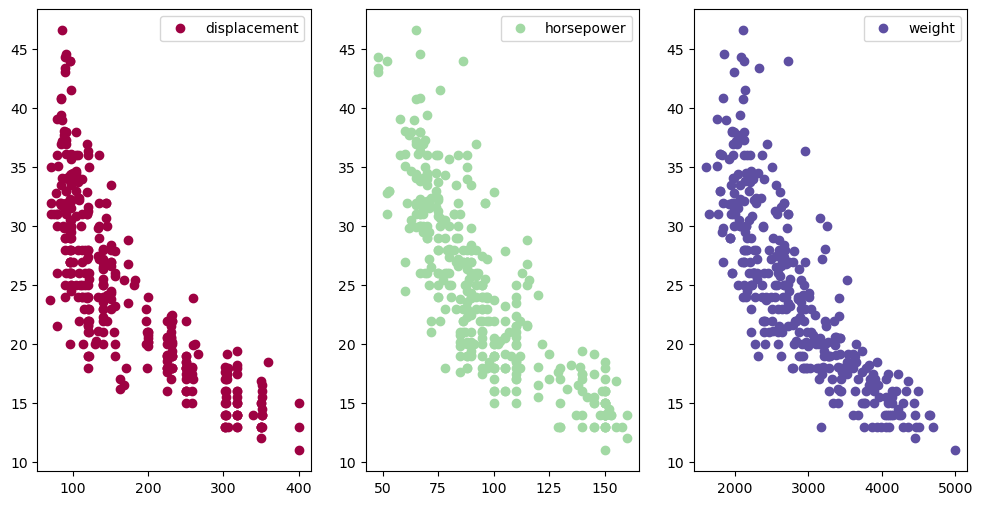

In [246]:
fig, axe = plt.subplots(1,3, figsize=(12,6))
axe = axe.flatten()
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0,5, 8)]

for ax, col, color1 in zip(axe, mpgDF.columns[2:5], colors):
    ax.plot(mpgDF[col],mpgDF['mpg'], 'o', color = color1, label = col)
    
    ax.legend()


In [245]:
mpgDF.drop(mpgDF.loc[(mpgDF['horsepower']>125) & (mpgDF['mpg']>30),:].index, inplace=True)

In [248]:
# feature = mpgDF[['cylinders', 'displacement','horsepower','weight']]
# 실린더제외
feature = mpgDF[['displacement','horsepower','weight']]
target = mpgDF['mpg']

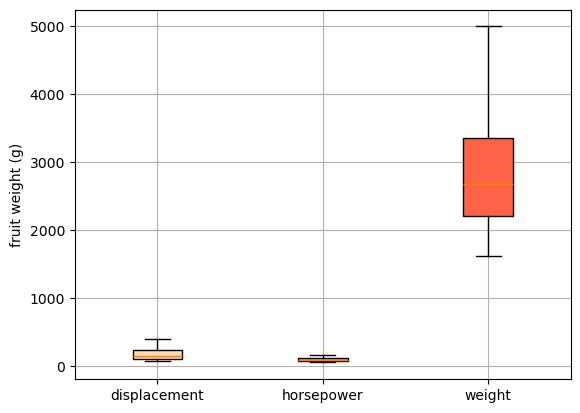

In [249]:
np.random.seed(19680801)
fruit_weights = [
    np.random.normal(130, 10, size=100),
    np.random.normal(125, 20, size=100),
    np.random.normal(120, 30, size=100),
]
labels = feature.columns
colors = ['peachpuff', 'orange', 'tomato']

fig, ax = plt.subplots()
ax.set_ylabel('fruit weight (g)')

bplot = ax.boxplot(mpgDF[['displacement','horsepower','weight']],
                   patch_artist=True,  # fill with color
                   tick_labels=labels)  # will be used to label x-ticks

# fill with colors
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

plt.grid()
plt.show()

In [250]:
array = feature.to_numpy()
minmax = MinMaxScaler()
narr = minmax.fit_transform(array)
feature_a = pd.DataFrame(narr)

[3] 데이터셋 준비
- 피처와 타겟 분리
- 학습용/검증용/테스트용 데이터셋 분리 => 학습용과 테스트용으로만 분리

In [251]:
## 3-1 피처와 타겟 분리
featureDF = feature_a
targetSR = target
print(f"featureDF => {featureDF.ndim}D, targetSr => {targetSR.ndim}D")

featureDF => 2D, targetSr => 1D


In [252]:
## 3-2 데이터셋 분리 => 학습용 : 테스트용 75:25 (default ratio)
X_train, X_test, y_train, y_test = train_test_split(featureDF,
                                                    targetSR,
                                                    random_state=303)
print(f"X_train => {X_train.ndim}D {X_train.shape} / X_test => {X_test.ndim}D, {X_test.shape}")
print(f"y_train => {y_train.ndim}D {y_train.shape} / y_test => {X_test.ndim}D, {y_test.shape}")

X_train => 2D (264, 3) / X_test => 2D, (89, 3)
y_train => 1D (264,) / y_test => 2D, (89,)


[4] 학습 진행

In [253]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [254]:
## 학습 후 모델에 적용되는 a,b: 모델 파라미터
print(f"lr.coef_ {lr.coef_}")
print(f"lr.intercept_ {lr.intercept_}")
print(f"X_train = {lr.coef_[0]}*y_train + {lr.intercept_}")

lr.coef_ [ -3.49684834  -8.2241427  -14.97189232]
lr.intercept_ 34.350633152349694
X_train = -3.496848339604104*y_train + 34.350633152349694


[5] 성능 평가 <hr>
- 모델 성능 평가
- 손실 계산

In [210]:
## 모듈화
r_dict = {x:[] for x in ['score', 'r2score','rmse', 'mse', 'mae']}
for x, y in [[X_train,  y_train], [X_test, y_test]]:
    score = lr.score(x, y)
    pre_y = lr.predict(x)
    r2score = r2_score(y, pre_y)
    rmse = root_mean_squared_error(y, pre_y)
    mse = mean_squared_error(y, pre_y)
    mae = mean_absolute_error(y,pre_y)
    r_dict['score'].append(score)
    r_dict['r2score'].append(r2score)
    r_dict['rmse'].append(rmse)
    r_dict['mse'].append(mse)
    r_dict['mae'].append(mae)

r_dict    
    

{'score': [0.6762176467689154, 0.6712981836058884],
 'r2score': [0.6762176467689154, 0.6712981836058884],
 'rmse': [4.155160685301753, 4.3854926029030725],
 'mse': [17.26536032067733, 19.232545370117567],
 'mae': [3.2005592747973046, 3.3076186061811654]}

In [256]:
resultDF = pd.DataFrame(r_dict, index=['train', 'test'])
# 3번쨰 차이 열 추가
resultDF.loc['diff'] = (resultDF.loc['train']-resultDF.loc['test']).abs()
resultDF.round(4)

,score,r2score,rmse,mse,mae
train,0.6762,0.6762,4.1552,17.2654,3.2006
test,0.6713,0.6713,4.3855,19.2325,3.3076
diff,0.0049,0.0049,0.2303,1.9672,0.1071


In [257]:
X_train.head()

,0,1,2
172,0.703030,0.732143,0.666962
77,0.115152,0.410714,0.226359
339,0.224242,0.428571,0.310875
335,0.063636,0.169643,0.112884
336,0.336364,0.553571,0.393617


In [258]:
len(lr.coef_)

3

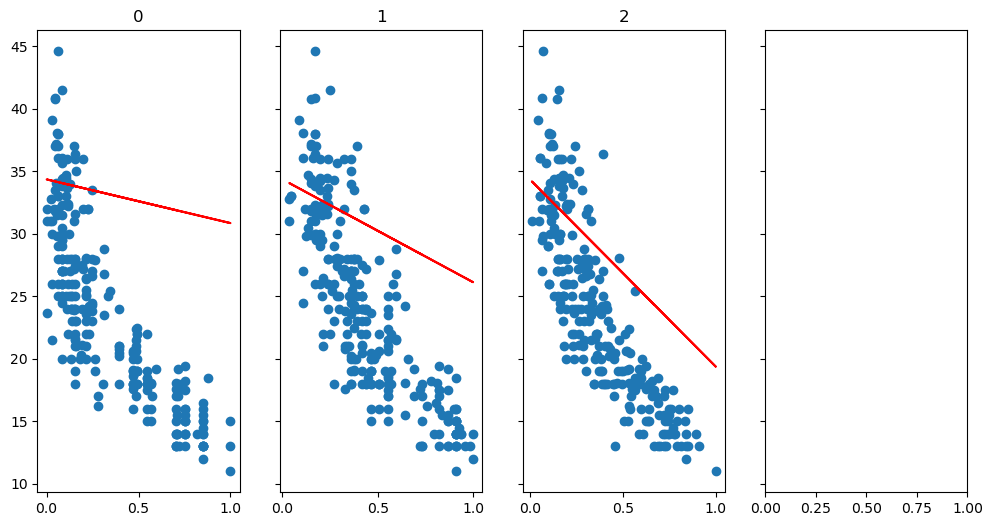

In [259]:
fig, axes = plt.subplots(1,4, figsize=(12,6), sharey=True)
for ax, col, i in zip(axes, X_train.columns, range(len(lr.coef_))):
    y = X_train[col]*lr.coef_[i]+lr.intercept_
    ax.plot(X_train[col], y_train, 'o', label=col)
    ax.plot(X_train[col], y, 'r-', label='Poly Line')
    ax.set_title(col)

plt.show()

결과분석
- test 점수가 더 높지만, 점수 자체가 낮음
- => 과소적합

해결방안
- 컬럼 생성하여 다항으로 
- 곡선분포로 보임

[6] 특성공학 - 피처 생성 추가


In [260]:
## [6-1] 모듈로딩
from sklearn.preprocessing import PolynomialFeatures

In [261]:
# x-train, x-test
poly = PolynomialFeatures() 

poly.fit(X_train)

poly_train = poly.transform(X_train)
poly_test  = poly.transform(X_test)

In [262]:
print(f'학습용 {type(poly_train)}, {poly_train.shape}')
print(f'테스트용 {type(poly_test)}, {poly_test.shape}')

학습용 <class 'numpy.ndarray'>, (264, 10)
테스트용 <class 'numpy.ndarray'>, (89, 10)


[7] 재학습 <hr>

In [263]:
## - 선형회귀인스턴스 생성
polyModel = LinearRegression()
## - 학습
polyModel.fit(poly_train, y_train)

LinearRegression()

In [264]:
## 학습 후 모델에 적용되는 a,b: 모델 파라미터
print(f"polyModel.coef_ {polyModel.coef_}")
print(f"polyModel.intercept_ {polyModel.intercept_}")
print(f"X_train = {polyModel.coef_[0]}*y_train + {polyModel.intercept_}")

polyModel.coef_ [  0.         -30.97406648  -9.33426226  -4.77615866 -47.29484104
  83.47985081  37.44497551 -12.82641713 -40.15149699   0.28094767]
polyModel.intercept_ 36.707245641793854
X_train = 0.0*y_train + 36.707245641793854


In [265]:
print( "min :", X_train.min().values[0], "max :", X_train.max().values[0] )
min_x, max_x = X_train.min().values[0], X_train.max().values[0]
# minmax 해서 0~1
## - 곡선 회귀식에 대입할 데이터 
x=np.linspace(min_x, max_x)  # 1<= ~ <=42 범위에서 균등하게 50개[기본값] 데이터 생성 
print('shape :' , x.shape)
print(x)

min : 0.0 max : 1.0
shape : (50,)
[0.         0.02040816 0.04081633 0.06122449 0.08163265 0.10204082
 0.12244898 0.14285714 0.16326531 0.18367347 0.20408163 0.2244898
 0.24489796 0.26530612 0.28571429 0.30612245 0.32653061 0.34693878
 0.36734694 0.3877551  0.40816327 0.42857143 0.44897959 0.46938776
 0.48979592 0.51020408 0.53061224 0.55102041 0.57142857 0.59183673
 0.6122449  0.63265306 0.65306122 0.67346939 0.69387755 0.71428571
 0.73469388 0.75510204 0.7755102  0.79591837 0.81632653 0.83673469
 0.85714286 0.87755102 0.89795918 0.91836735 0.93877551 0.95918367
 0.97959184 1.        ]


In [266]:
## - 곡선 회귀식 : y = x^0*W0 + x^1*W1 x^2*W2 + b
y = (1*polyModel.coef_[0]) + (x * polyModel.coef_[1]) + ((x**2)*polyModel.coef_[2]) + polyModel.intercept_

print('shape :' , y.shape)
print(y)

shape : (50,)
[36.70724564 36.07123418 35.42744741 34.77588532 34.11654792 33.44943521
 32.77454719 32.09188385 31.40144521 30.70323125 29.99724198 29.28347739
 28.5619375  27.83262229 27.09553177 26.35066594 25.59802479 24.83760834
 24.06941657 23.29344949 22.50970709 21.71818939 20.91889637 20.11182804
 19.2969844  18.47436545 17.64397118 16.8058016  15.95985671 15.10613651
 14.24464099 13.37537017 12.49832403 11.61350258 10.72090581  9.82053374
  8.91238635  7.99646365  7.07276564  6.14129231  5.20204368  4.25501973
  3.30022047  2.3376459   1.36729601  0.38917081 -0.5967297  -1.59040552
 -2.59185665 -3.6010831 ]


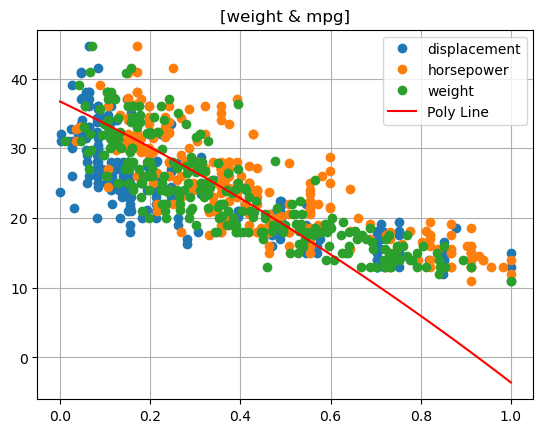

In [267]:
## 시각화 및 회귀선 -----------------------------------
## 데이터 시각화
labels = ['displacement', 'horsepower', 'weight']
plt.plot(X_train, y_train, 'o', label = labels)

# 선형회귀에서 구한 y=model.coef_*x+model.intercept_ 공식의 직선 긋기
plt.plot(x, y, 'r-', label='Poly Line')

plt.title('[weight & mpg]')
plt.legend()
plt.grid()
plt.show()

In [147]:
## 모듈화
r_dict = {x:[] for x in ['score', 'r2score','rmse', 'mse', 'mae']}
for x, y in [[poly_train, y_train], [poly_test, y_test]]:
    score = polyModel.score(x, y)
    pre_y = polyModel.predict(x)
    r2score = r2_score(y, pre_y)
    rmse = root_mean_squared_error(y, pre_y)
    mse = mean_squared_error(y, pre_y)
    mae = mean_absolute_error(y,pre_y)
    r_dict['score'].append(score)
    r_dict['r2score'].append(r2score)
    r_dict['rmse'].append(rmse)
    r_dict['mse'].append(mse)
    r_dict['mae'].append(mae)

r_dict    
    

{'score': [0.6845888507425784, 0.7321288913285431],
 'r2score': [0.6845888507425784, 0.7321288913285431],
 'rmse': [4.0908621583858045, 4.093608951422776],
 'mse': [16.735153198912965, 16.757634247168678],
 'mae': [3.0095915575755368, 2.848000272199237]}

In [148]:
resultDF2 = pd.DataFrame(r_dict, index=['ptrain', 'ptest'])
resultDF2.loc['diff'] = (resultDF2.loc['ptrain']-resultDF2.loc['ptest']).abs()
resultDF2.round(4)

,score,r2score,rmse,mse,mae
ptrain,0.6846,0.6846,4.0909,16.7352,3.0096
ptest,0.7321,0.7321,4.0936,16.7576,2.8480
diff,0.0475,0.0475,0.0027,0.0225,0.1616


In [149]:
resultDF.round(4)

,score,r2score,rmse,mse,mae
train,0.6550,0.6550,4.2783,18.3040,3.2725
test,0.6715,0.6715,4.5336,20.5532,3.3288
diff,0.0164,0.0164,0.2552,2.2491,0.0563


In [150]:
## 과소적합